# Multivariate Linear Regression
- 1개 이상의 feature로 구성된 데이터를 분석할 때

- 식은 많아지지만 여전히 cost function의 최적화

> $J(w_0, w_1, \cdots, w_n) = {1\over2m}\displaystyle\sum_{i=1}^{m}{(w_1{x_1}^{(i)} + w_2{x_2}^{(i)} + \cdots + w_n{x_n}^{(i)} + w_0 - y^{(i)})^2} = {1\over2m}\displaystyle\sum_{i=1}^{m}{(Xw - y^{(i)})^2}$ <br>
> ${{\partial}J\over{\partial}{w_0}} = {1\over{m}}\displaystyle\sum_{i=1}^{m}{(Xw-y^{(i)})}$ <br>
> ${{\partial}J\over{\partial}{w_1}} = {1\over{m}}\displaystyle\sum_{i=1}^{m}{(Xw-y^{(i)})x_1}$ <br>
> ${{\partial}J\over{\partial}{w_2}} = {1\over{m}}\displaystyle\sum_{i=1}^{m}{(Xw-y^{(i)})x_2}$ <br>
> ${{\partial}J\over{\partial}{w_n}} = {1\over{m}}\displaystyle\sum_{i=1}^{m}{(Xw-y^{(i)})x_n}$ <br>
- GD 과정에서, 위 식에서 도출된 $w$값들을 simultaneously하게 update하는 것이 중요함

## Implementation

In [20]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

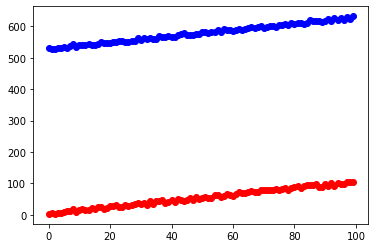

In [21]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape = (numPoints, 3))
    y = np.zeros(shape = numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], 'ro')
plt.plot(y, 'bo')

plt.show()

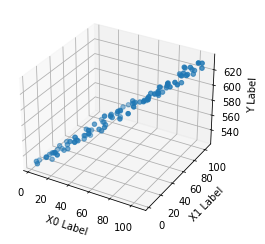

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [23]:
def compute_cost(x, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

In [24]:
def minimize_gradient(x, y, theta, iterations = 100000, alpha = 0.01):

    m = y.size
    cost_history = []
    theta_history = []

    for _ in range(iterations):
        predictions = x.dot(theta) # hypothesis function Xw

        for i in range(theta.size):
            partial_marginal = x[:, i] # x_0, x_1, x_2
            errors_xi = (predictions - y) * partial_marginal # sum 이전의 cost function
            theta[i] = theta[i] - alpha * (1 / m) * errors_xi.sum() # GD

        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)
            

In [35]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(
                                    x, y, theta_initial, 1000000, 0.0001)
print('theta', theta)
print(type(theta))

theta [5.51040349e-01 4.50310894e-01 5.23796800e+02]
<class 'numpy.ndarray'>


In [27]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# The coefficients
print('Coefficients : ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients :  [0.55104035 0.45031089]
intercept:  523.7968005658624


In [28]:
print(np.dot(theta, x[10]))
print(regr.predict(x[10,:2].reshape(1,2)))

540.229992998405
[540.22999316]


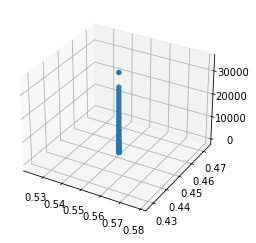

In [29]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter3D(theta_history[:,0], theta_history[:, 1], cost_history, zdir = 'z')

plt.show()

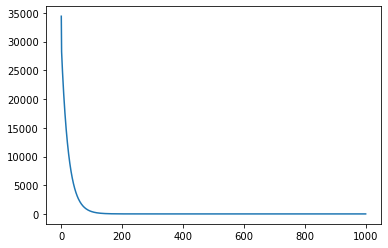

In [31]:
plt.plot(cost_history)
plt.show()